### This project includes:
1. Data Analysis & Distribution (EDA)
2. Time Series Analysis
3. NLP Processing & Text Analysis
  
### This notebook is the third part: NLP Processing & Text Analysis

In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

# Read Data

In [3]:
clients = pd.read_csv("clients.csv")
questions = pd.read_csv("questions.csv")
attorneys = pd.read_csv("attorneys.csv")
questions = pd.read_csv("questions.csv")

In [4]:
qp = []

with open('questionposts.txt', 'r') as file:
    for line in file:
        qp.append(line)
        
Qposts = pd.DataFrame([line.split(',', 3) for line in qp], columns=['Id', 'StateAbbr', 'QuestionUno', 'PostText'])

Qposts[['PostText', 'CreatedUtc']] = Qposts['PostText'].str.rsplit(',', 1, expand=True)

In [5]:
Qposts['PostText'] = Qposts['PostText'].str.replace(r'^"|"$', '', regex=True)
Qposts['CreatedUtc'] = Qposts['CreatedUtc'].str.replace(r'"', '', regex=True).str.replace(r'\n', '', regex=True)

Qposts = Qposts.iloc[1:]

In [6]:
attorneys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11544 entries, 0 to 11543
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           11544 non-null  int64 
 1   StateAbbr    11544 non-null  object
 2   AttorneyUno  11544 non-null  object
 3   City         11529 non-null  object
 4   County       11539 non-null  object
 5   StateName    11544 non-null  object
 6   PostalCode   11544 non-null  int64 
 7   CreatedUtc   11544 non-null  object
dtypes: int64(2), object(6)
memory usage: 721.6+ KB


In [7]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331426 entries, 0 to 331425
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  331426 non-null  int64  
 1   StateAbbr           331426 non-null  object 
 2   ClientUno           331426 non-null  object 
 3   County              331180 non-null  object 
 4   StateName           331426 non-null  object 
 5   PostalCode          314157 non-null  float64
 6   EthnicIdentity      278298 non-null  object 
 7   Age                 279870 non-null  float64
 8   Gender              280227 non-null  object 
 9   MaritalStatus       279548 non-null  object 
 10  Veteran             269757 non-null  object 
 11  Imprisoned          280602 non-null  object 
 12  NumberInHousehold   280602 non-null  float64
 13  AnnualIncome        280565 non-null  float64
 14  AllowedIncome       280602 non-null  float64
 15  CheckingBalance     212020 non-nul

In [8]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202879 entries, 0 to 202878
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   202879 non-null  int64 
 1   StateAbbr            202879 non-null  object
 2   QuestionUno          202879 non-null  object
 3   CategoryUno          202879 non-null  object
 4   Category             202879 non-null  object
 5   SubcategoryUno       202879 non-null  object
 6   Subcategory          202879 non-null  object
 7   AskedByClientUno     202841 non-null  object
 8   AskedOnUtc           202879 non-null  object
 9   TakenByAttorneyUno   144005 non-null  object
 10  TakenOnUtc           145651 non-null  object
 11  ClosedByAttorneyUno  137787 non-null  object
 12  ClosedOnUtc          199085 non-null  object
 13  LegalDeadline        43944 non-null   object
dtypes: int64(1), object(13)
memory usage: 21.7+ MB


In [9]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202879 entries, 0 to 202878
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   202879 non-null  int64 
 1   StateAbbr            202879 non-null  object
 2   QuestionUno          202879 non-null  object
 3   CategoryUno          202879 non-null  object
 4   Category             202879 non-null  object
 5   SubcategoryUno       202879 non-null  object
 6   Subcategory          202879 non-null  object
 7   AskedByClientUno     202841 non-null  object
 8   AskedOnUtc           202879 non-null  object
 9   TakenByAttorneyUno   144005 non-null  object
 10  TakenOnUtc           145651 non-null  object
 11  ClosedByAttorneyUno  137787 non-null  object
 12  ClosedOnUtc          199085 non-null  object
 13  LegalDeadline        43944 non-null   object
dtypes: int64(1), object(13)
memory usage: 21.7+ MB


In [10]:
Qposts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406188 entries, 1 to 406188
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Id           406188 non-null  object
 1   StateAbbr    405593 non-null  object
 2   QuestionUno  405589 non-null  object
 3   PostText     405580 non-null  object
 4   CreatedUtc   405570 non-null  object
dtypes: object(5)
memory usage: 15.5+ MB


---

# Text Analysis
1. Text Classification
2. Text Clustering w/ Word Cloud
3. Topic Modeling

### Text Classifictaion

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [12]:
import string

def remove_punctuation(text):
    if text is not None:
        translator = str.maketrans('', '', string.punctuation)
        return text.translate(translator)
    else:
        return ""

def to_lowercase(text):
    if text is not None:
        return text.lower()
    else:
        return ""

def remove_stopwords(text):
    if text is not None:
        stop_words = set(stopwords.words('english'))
        words = word_tokenize(text)
        filtered_words = [word for word in words if word.lower() not in stop_words]
        return ' '.join(filtered_words)
    else:
        return ""

In [13]:
Qposts['PostText'] = Qposts['PostText'].apply(remove_punctuation)
Qposts['PostText'] = Qposts['PostText'].apply(to_lowercase)
Qposts['PostText'] = Qposts['PostText'].apply(remove_stopwords)

In [14]:
merged_data = pd.merge(Qposts, questions[['Category','QuestionUno']], on='QuestionUno', how='left').dropna()
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405531 entries, 0 to 406187
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Id           405531 non-null  object
 1   StateAbbr    405531 non-null  object
 2   QuestionUno  405531 non-null  object
 3   PostText     405531 non-null  object
 4   CreatedUtc   405531 non-null  object
 5   Category     405531 non-null  object
dtypes: object(6)
memory usage: 21.7+ MB


In [15]:
X = merged_data['PostText']
y = merged_data['Category']

In [16]:
tfidf_vectorizer = TfidfVectorizer()
classifier = MultinomialNB()

In [17]:
### Apply train-test split evaluation

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text vectorization
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

classifier.fit(X_train_tfidf, y_train)

# Model evaluation
y_pred = classifier.predict(X_test_tfidf)
class_report = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:\n", class_report)

Classification Report:
                                    precision    recall  f1-score   support

     Consumer Financial Questions       0.79      0.04      0.08      7476
                        Education       1.00      0.00      0.00       279
              Family and Children       0.52      0.99      0.68     33007
            Health and Disability       1.00      0.00      0.00       935
         Housing and Homelessness       0.79      0.61      0.68     16092
               Income Maintenance       1.00      0.00      0.00       958
                Individual Rights       0.00      0.00      0.00      3301
                         Juvenile       1.00      0.00      0.00       115
                            Other       0.52      0.16      0.25     14597
Work, Employment and Unemployment       0.84      0.02      0.05      4347

                         accuracy                           0.56     81107
                        macro avg       0.75      0.18      0.17     81107

In [18]:
### Apply K-fold cross validation

# Text vectorization
X_tfidf = tfidf_vectorizer.fit_transform(X)

k = 10

# Stratified k-fold cross-validator
stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Model evaluation
scores = cross_val_score(classifier, X_tfidf, y, cv=stratified_kfold, scoring='accuracy')
print("Accuracy scores for each fold:\n", scores)
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)

Accuracy scores for each fold:
 [0.56154757 0.56035312 0.56195596 0.55914482 0.5613888  0.56200528
 0.56136414 0.56057505 0.5619313  0.56185732]
Mean Accuracy: 0.5612123355915316
Standard Deviation of Accuracy: 0.0008775084071796114


### Text Clustering & Word Cloud

In [23]:
from sklearn.cluster import KMeans

In [27]:
# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(Qposts['PostText'])

In [ ]:
min_clusters = 2
max_clusters = 20

silhouette_scores = []

# Calculate silhouette scores for each
for num_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters)
    cluster_labels = kmeans.fit_predict(tfidf_matrix)
    silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.grid(True)
plt.show()

In [28]:
# Apply K-means clustering
num_clusters = 13
kmeans = KMeans(n_clusters=num_clusters)
Qposts['Cluster'] = kmeans.fit_predict(tfidf_matrix)

for cluster_id in range(num_clusters):
    cluster_data = Qposts[Qposts['Cluster'] == cluster_id]
    print(f"Cluster {cluster_id}:")
    print(cluster_data['PostText'][:5])

In [63]:
Qposts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406188 entries, 1 to 406188
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Id           406188 non-null  object
 1   StateAbbr    405593 non-null  object
 2   QuestionUno  405589 non-null  object
 3   PostText     406188 non-null  object
 4   CreatedUtc   405570 non-null  object
 5   Cluster      406188 non-null  int32 
dtypes: int32(1), object(5)
memory usage: 17.0+ MB


In [53]:
from wordcloud import WordCloud

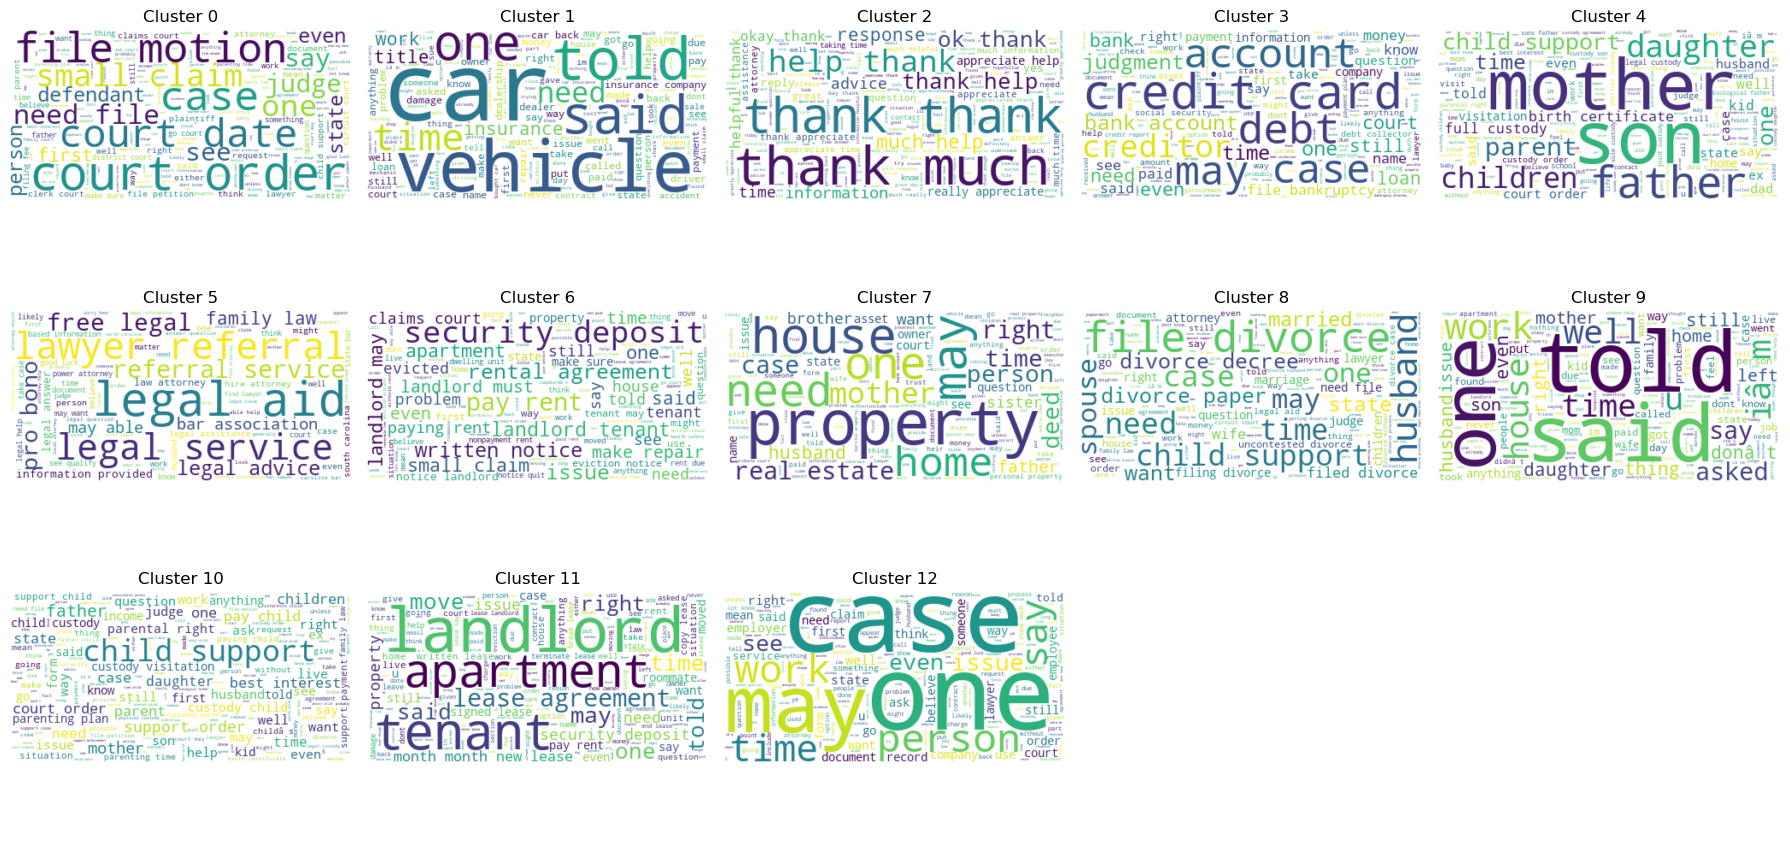

In [71]:
wordclouds = []

# Iterate through each cluster
for cluster_id in range(13):
    cluster_text = Qposts.loc[Qposts['Cluster'] == cluster_id, 'PostText'].str.cat(sep=' ')
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(cluster_text)
    wordclouds.append(wordcloud)

# Create subplots for each cluster's word cloud
fig, axes = plt.subplots(3, 5, figsize=(18, 9))
axes = axes.ravel()
for i in range(13):
    axes[i].imshow(wordclouds[i], interpolation='bilinear')
    axes[i].set_title(f'Cluster {i}')
    axes[i].axis('off')

axes[14].axis('off')
axes[13].axis('off')
plt.tight_layout()
plt.show()

### Topic Modeling

In [32]:
import gensim
from gensim import corpora, models
from gensim.models import LdaModel
from gensim.models import CoherenceModel

In [34]:
# LDA for each clusters
clusters = Qposts['Cluster'].unique()

for cluster in clusters:
    cluster_data = Qposts[Qposts['Cluster'] == cluster]
    documents = cluster_data['PostText'].tolist()

    # Tokenize the documents
    tokenized_docs = [word_tokenize(doc) for doc in documents]

    dictionary = corpora.Dictionary(tokenized_docs)
    corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

    # Perform LDA
    lda_model = models.LdaModel(corpus, num_topics=1, id2word=dictionary, passes=15)

    print(f"Cluster {cluster} Topics:")
    for topic_id, topic_words in lda_model.print_topics():
        print(f"{topic_words}")

Cluster 2 Topics:
0.010*"would" + 0.006*"may" + 0.005*"get" + 0.005*"need" + 0.004*"information" + 0.004*"also" + 0.004*"thank" + 0.004*"law" + 0.004*"case" + 0.004*"court"
Cluster 7 Topics:
0.018*"custody" + 0.013*"father" + 0.012*"son" + 0.011*"court" + 0.009*"would" + 0.009*"child" + 0.008*"get" + 0.008*"daughter" + 0.008*"children" + 0.007*"order"
Cluster 12 Topics:
0.046*"car" + 0.010*"vehicle" + 0.009*"would" + 0.009*"get" + 0.008*"insurance" + 0.006*"back" + 0.006*"pay" + 0.006*"title" + 0.005*"name" + 0.005*"court"
Cluster 9 Topics:
0.009*"would" + 0.008*"get" + 0.007*"told" + 0.006*"know" + 0.006*"time" + 0.006*"pay" + 0.006*"said" + 0.005*"work" + 0.005*"back" + 0.005*"money"
Cluster 4 Topics:
0.045*"child" + 0.024*"support" + 0.017*"court" + 0.011*"custody" + 0.010*"order" + 0.009*"parent" + 0.008*"would" + 0.007*"father" + 0.006*"may" + 0.006*"need"
Cluster 8 Topics:
0.043*"divorce" + 0.013*"court" + 0.012*"file" + 0.010*"need" + 0.008*"husband" + 0.008*"get" + 0.008*"would

In [20]:
documents = Qposts['PostText'].tolist()

tokenized_docs = [word_tokenize(doc) for doc in documents]

dictionary = corpora.Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

In [35]:
# LDA based on the whole dataset
lda_model = models.LdaModel(corpus, num_topics=13, id2word=dictionary, passes=15)

for topic_id, topic_words in lda_model.print_topics():
    print(f"Topic {topic_id}: {topic_words}")

Topic 0: 0.011*"screenshot" + 0.011*"lowincome" + 0.010*"flooding" + 0.006*"creditor" + 0.006*"19th" + 0.006*"proposal" + 0.005*"arrest" + 0.005*"decorations" + 0.004*"proposing" + 0.004*"pitbull"
Topic 1: 0.095*"lease" + 0.092*"new" + 0.034*"owner" + 0.032*"property" + 0.031*"rent" + 0.027*"sign" + 0.023*"signed" + 0.018*"current" + 0.015*"increase" + 0.013*"agreement"
Topic 2: 0.020*"issues" + 0.018*"unit" + 0.017*"repairs" + 0.015*"fix" + 0.015*"water" + 0.015*"mold" + 0.013*"apartment" + 0.013*"health" + 0.012*"issue" + 0.012*"repair"
Topic 3: 0.036*"property" + 0.022*"tenant" + 0.021*"home" + 0.017*"lease" + 0.011*"owner" + 0.011*"agreement" + 0.010*"tenants" + 0.009*"utilities" + 0.008*"house" + 0.008*"name"
Topic 4: 0.043*"lease" + 0.020*"landlord" + 0.017*"would" + 0.016*"court" + 0.014*"may" + 0.009*"eviction" + 0.009*"get" + 0.008*"rent" + 0.008*"legal" + 0.007*"case"
Topic 5: 0.080*"deposit" + 0.052*"security" + 0.024*"paid" + 0.023*"rent" + 0.020*"fees" + 0.017*"fee" + 0.01

---

### For the other two parts of the project, please refer to the other two ipynb
1. Data Analysis & Distribution (EDA)
2. Time Series Analysis